In [ ]:
# 구글 드라이브와 연동하는 방법 입니다. 
# Google File Drive Stream 접근을 허용해야 합니다.
from google.colab import auth
auth.authenticate_user()

# 구글 드라이브 mount
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
%cd gdrive/My Drive/datasets/cats_and_dogs_small

/content/gdrive/My Drive/datasets/cats_and_dogs_small


In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
VGG = load_model("./MyVGGNet_200521.h5")

In [ ]:
VGG.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
pip install flickrapi

     |████████████████████████████████| 61kB 3.4MB/s 


In [ ]:
from flickrapi import FlickrAPI

FLICKER_KEY = '505e8c2b05e8b5aa51766a43fc4bc7a7'
FLICKER_SECRET = '46b3ef2f43b04ac6'

flickr = FlickrAPI(FLICKER_KEY, FLICKER_SECRET, format='parsed-json')
extras='url_s'
cats = flickr.photos.search(text='kitten', per_page=5, extras=extras)
photos = cats['photos']

In [ ]:
# import the necessary packages
import numpy as np
import urllib
import cv2

def url_to_image(url):
  # python 2
  # resp = urllib.urlopen(url)
  
  # python 3
  resp = urllib.request.urlopen(url)
  
  image = np.asarray(bytearray(resp.read()), dtype="uint8")
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)

  return image

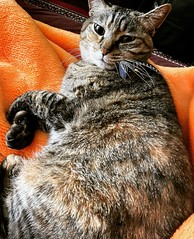

In [ ]:
from google.colab.patches import cv2_imshow

image_original_url = photos['photo'][0]['url_s']

image_temp = url_to_image(image_original_url)
cv2_imshow(image_temp)

In [ ]:
resized_image = cv2.resize(image_temp, (224, 224))
resized_image = np.expand_dims(resized_image, axis=0)
print (resized_image.shape)

(1, 224, 224, 3)


In [ ]:
result = VGG.predict(resized_image)

In [ ]:
result

array([[1., 0.]], dtype=float32)

In [ ]:
temp = [0.00904351, 0.9909565]

In [ ]:
test = np.argmax(temp)

In [ ]:
test

1